<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/BeltExam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [608]:
#import modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [609]:
#read data
df = pd.read_csv('/content/employee_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 1. Data Cleansing

In [610]:
#check general info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [611]:
#check for duplicates
df.duplicated().any()

False

Output above indicates there are no duplicates

In [612]:
#explore the Gender variable given it has some null values
df.Gender.value_counts()

Female    588
Name: Gender, dtype: int64

The Gender variable only has 'Female' value. It's reasonable to assume that the null values for the variable would be 'Male'

In [613]:
#fill the null values for the Gender variable with 'Male'
df['Gender'].fillna('Male', inplace=True)
df.Gender.value_counts() #check if the null values have been replaced

Male      882
Female    588
Name: Gender, dtype: int64

Output above indicates that the null values for the Gender variable have been filled with the value Male

In [614]:
#based on Data Dictionary the values for the 'YearsAtCompany' variable should be integers. The variable needs to be explored
df['YearsAtCompany'].value_counts()

5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
26      4
25      4
31      3
32      3
27      2
36      2
29      2
23      2
40      1
30      1
5!      1
34      1
37      1
Name: YearsAtCompany, dtype: int64

On checking the values in the 'YearsatCompany' variable, we find a '5!' which is an unexpected value. We therefore have to locate the row that has the '5!' and replace it with 5

In [615]:
#find the row that has the '5!' value in the 'YearsAtCompany' column
print(df.loc[df['YearsAtCompany'] == '5!'])

    Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
35   43        No  ...                       1                     4

[1 rows x 35 columns]


The '5!' value is in row 35, so we have to fix that

In [616]:
#change '5!' to 5 for 'YearsAtCompany' in row 35
df.loc[35, 'YearsAtCompany'] = 5
df.loc[35, 'YearsAtCompany'] #check to confirm the value has changed

5

In [617]:
#change the data type for the 'YearsAtCompany' variable to integer
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)
df['YearsAtCompany'].dtype #check to confirm the data type has changed

dtype('int64')

The values for the 'YearsAtCompany' variable are now integers

In [618]:
#get all columns in the dataframe that is of type 'object'
column_list = list(df.columns)
col_list = []
for col in column_list:
  if df[col].dtype == 'object':
    col_list.append(col) 
print(col_list,) #print the list of columns that are of type 'object

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [619]:
#check the value categories for all columns that are of type 'object' to ensure the categories are consistent
for col in col_list:
  counts = df[col].value_counts()
  print((counts).to_markdown())

|     |   Attrition |
|:----|------------:|
| No  |        1233 |
| Yes |         237 |
|                   |   BusinessTravel |
|:------------------|-----------------:|
| Travel_Rarely     |             1043 |
| Travel_Frequently |              277 |
| Non-Travel        |              150 |
|                        |   Department |
|:-----------------------|-------------:|
| Research & Development |          961 |
| Sales                  |          446 |
| Human Resources        |           63 |
|                  |   EducationField |
|:-----------------|-----------------:|
| Life Sciences    |              606 |
| Medical          |              464 |
| Marketing        |              159 |
| Technical Degree |              132 |
| Other            |               82 |
| Human Resources  |               27 |
|        |   Gender |
|:-------|---------:|
| Male   |      882 |
| Female |      588 |
|                           |   JobRole |
|:--------------------------|----------:|
| Sal

Result above indicates that the categorical values are consistent. It also shows that the Over18 column has the value Y for all rows, so we have to drop this column because it does not add any predictive value

In [620]:
#generate descriptive stats for the numerical data to ensure the values make sense
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the above the 'EmployeeCount' and 'StandardHours columns are showing the value 1 and 80 respectively for each row and the std for the variables = 0, meaning the values are the same for each row for these two variables. We have to therefore drop these variables

In [621]:
#dropping the columns with no predictive value
df.drop(columns= ['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.info() #print columns to see if indicated columns have been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Result above shows that the EmployeeCount and Over18 columns have been dropped

# 2. Univariate Exploratory Visualization

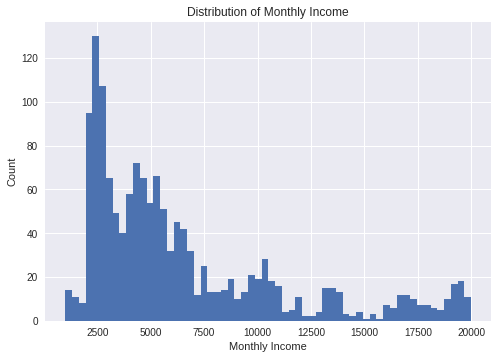

In [622]:
#MonthlyIncome and WorkLifeBalance are interesting variables to explore given their potential to affect attrition

#plot histogram of MonthlyIncome
import seaborn as sns
df['MonthlyIncome'].hist(bins=60)
plt.style.use('seaborn')
plt.xlabel('Monthly Income') #label the x axis
plt.ylabel('Count') #label the y axis
plt.title('Distribution of Monthly Income') #plot title
plt.show() #show plot

The distribution of the Monthly Income is not uniform and it is skewed to the right. This is not surprising given that few people are expected to earn salaries at the top of the range, while the majority will typically earn salaries at the lower end of the salary range

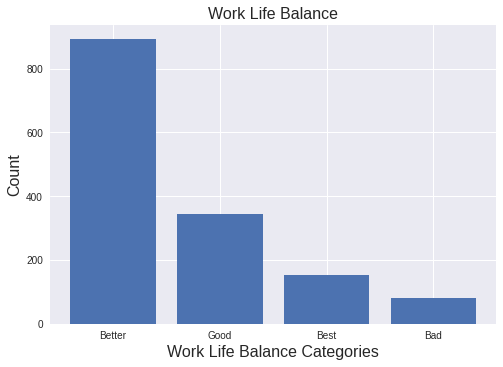

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [623]:
#plot Bar Chart of WorkLife Balance
wlb_count = df['WorkLifeBalance'].value_counts()
wlb_index = list(wlb_count.index) #make the WorkLifeBalance index into a list
wlb_index = ['Better', 'Good', 'Best', 'Bad'] #change the values of the WorkLifeBalance index from 3, 2, 4, 1 to 'Better', 'Good', 'Best', 'Bad'
wlb_values = list(wlb_count.values) #make the WorkLifeBalance values into a list
plt.bar(wlb_index, wlb_values) #make bars in different colors
plt.xlabel('Work Life Balance Categories', fontsize=16) #create x-axis labels
plt.ylabel('Count', fontsize=16) #create y-axis labels
plt.title('Work Life Balance', fontsize=16) #create a title for the chart
plt.show()
wlb_count

Plot above shows that the majority of the workforce are under the 'Better' category of Work Life Balance

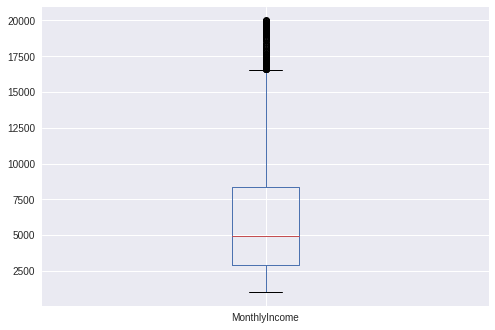

In [624]:
#plot boxplot of the Monthly Income to check for outliers
df.boxplot(column=['MonthlyIncome'])
plt.show()

# 3. Multivariate Exploratory Visualization

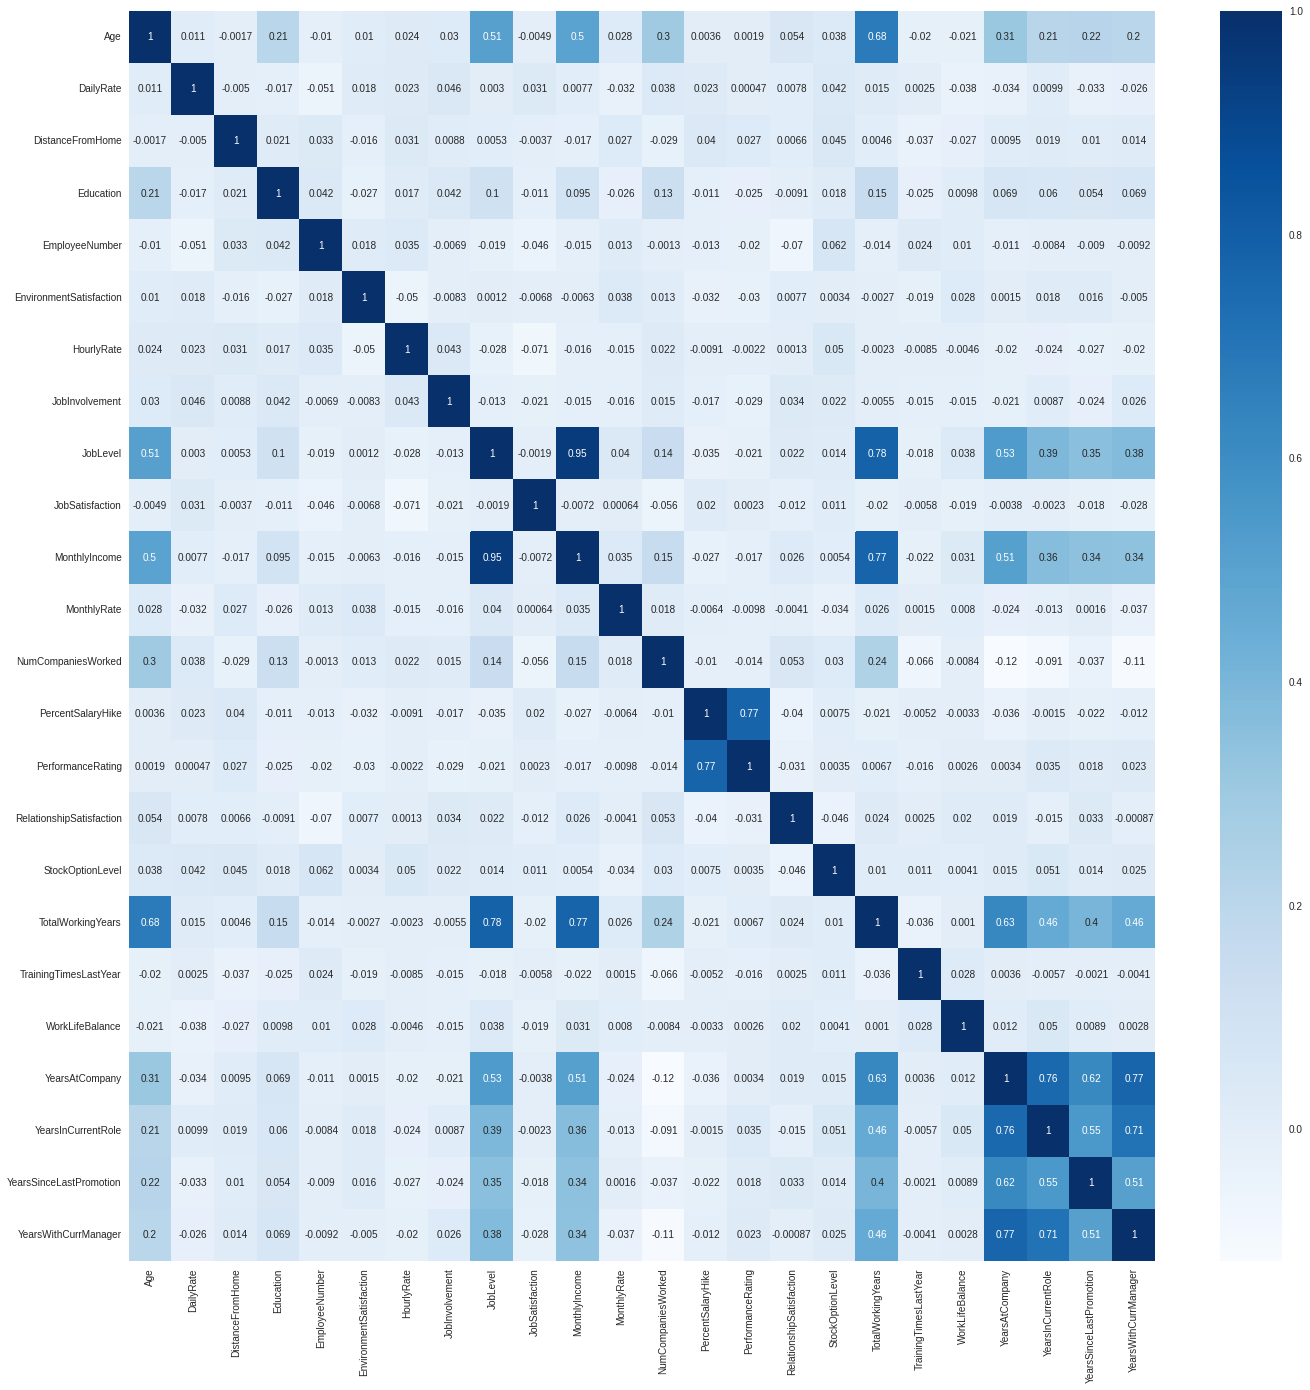

In [625]:
#visualize the correlation of the variables in the dataset
plt.figure(figsize=(23,23))
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.show()

The correlation matrix above is showing some interesting patterns. There's a strong correlation between (1) the years a person have spent in the company with the years they've spent with their current manager and (2) total working years and monthly income. At a correlation co-efficient of 0.51 the relationship between years at the company and income although positive, is not as strong as I expected

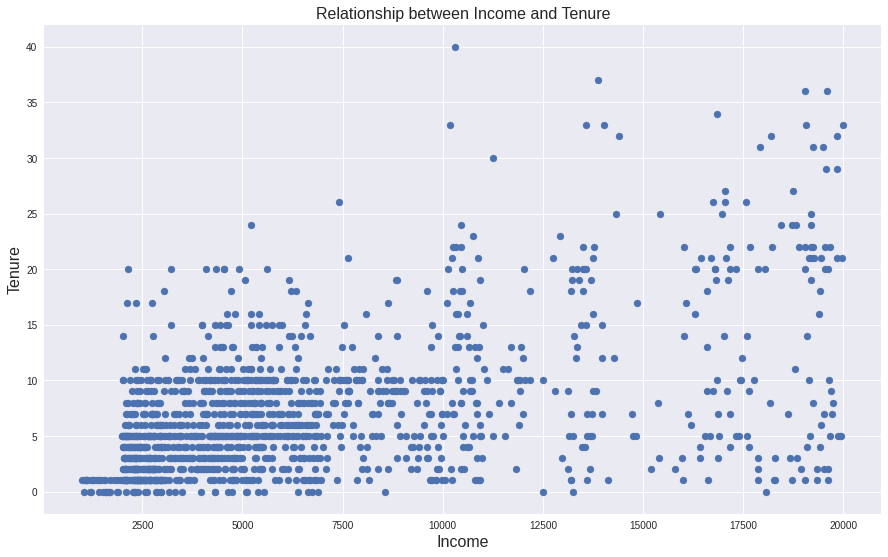

In [626]:
#visualize the relationship between salary and years at company
plt.figure(figsize=(15,9))
plt.scatter(df['MonthlyIncome'], df['YearsAtCompany'])
plt.xlabel('Income', fontsize=16) #create x-axis labels
plt.ylabel('Tenure', fontsize=16) #create y-axis labels
plt.title('Relationship between Income and Tenure', fontsize=16) #create a title for the chart
plt.show()

It would be interesting to see the Attribution proportion for the following variables of interest: 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'TrainingTimesLastYear','YearsSinceLastPromotion' 

In [627]:
#The block of code below intantitates the variables of interest into a variable, performs groupby on Attribution based on the mean of the variables,
#and makes a list of the index and values from the result of the groupbys

interest = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'TrainingTimesLastYear','YearsSinceLastPromotion']
for x in interest:
  mean_x = df.groupby('Attrition')[x].mean()
  if x == interest[0]:
    dr = mean_x
    dr_ind = list(dr.index)
    dr_val = list(dr.values) #DailyRate groupby with Attrition
  elif x == interest[1]:
    dif = mean_x #DistanceFromHome groupby with Attrition
    dif_ind = list(dif.index)
    dif_val = list(dif.values)
  elif x == interest[2]:
    hr = mean_x #HourlyRate groupby with Attrition
    hr_ind = list(hr.index)
    hr_val = list(hr.values)
  elif x == interest[3]:
    mi = mean_x #MonthlyIncome groupby with Attrition
    mi_ind = list(mi.index)
    mi_val = list(mi.values)
  elif x == interest[4]:
    tt = mean_x #TrainingTimesLastYear groupby with Attrition
    tt_ind = list(tt.index)
    tt_val = list(tt.values)
  elif x == interest[5]:
    yp = mean_x #YearsSinceLastPromotion groupby with Attrition
    yp_ind = list(yp.index)
    yp_val = list(yp.values)
 

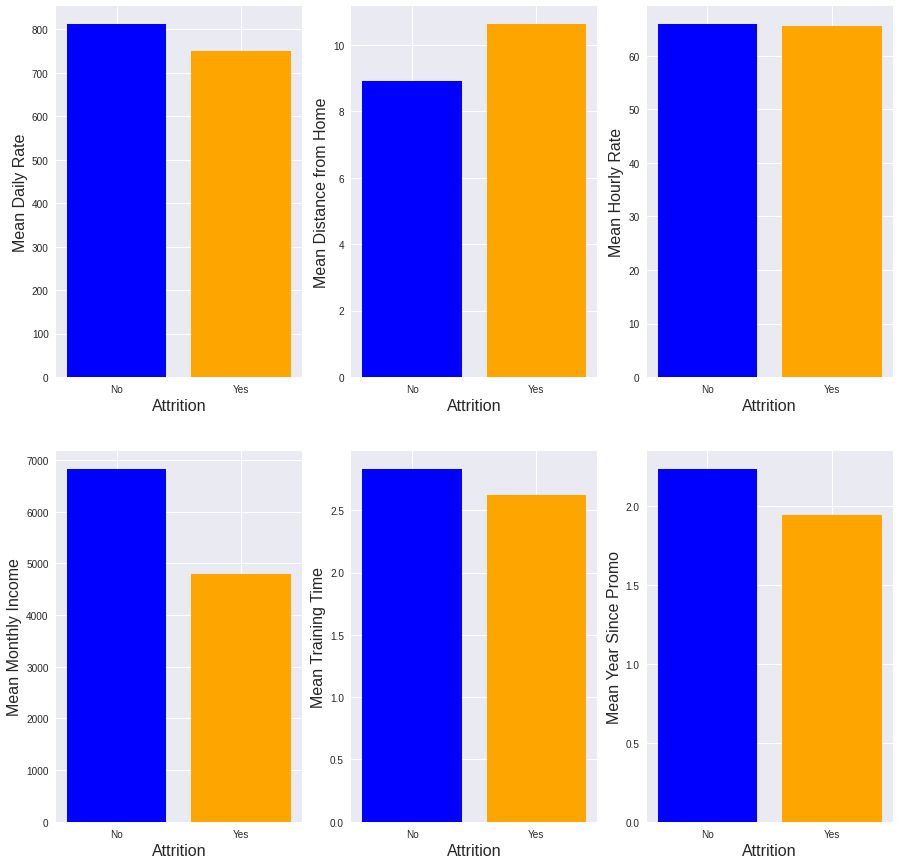

In [628]:
#plot subplots to visualize relationship of Attrition with selected variables
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.bar(dr_ind, dr_val, color=['blue', 'orange'])
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Daily Rate', fontsize=16) #create y-axis labels

plt.subplot(2,3,2)
plt.bar(dif_ind, dif_val, color=['blue', 'orange'])
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Distance from Home', fontsize=16) #create y-axis labels

plt.subplot(2,3,3)
plt.bar(hr_ind, hr_val, color=['blue', 'orange'])
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Hourly Rate', fontsize=16) #create y-axis labels

plt.subplot(2,3,4)
plt.bar(mi_ind, mi_val, color=['blue', 'orange'])
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Monthly Income', fontsize=16) #create y-axis labels

plt.subplot(2,3,5)
plt.bar(tt_ind, tt_val, color=['blue', 'orange'])
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Training Time', fontsize=16) #create y-axis labels

plt.subplot(2,3,6)
plt.bar(yp_ind, yp_val, color=['blue', 'orange'])
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Year Since Promo', fontsize=16) #create y-axis labels

plt.show()

Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64

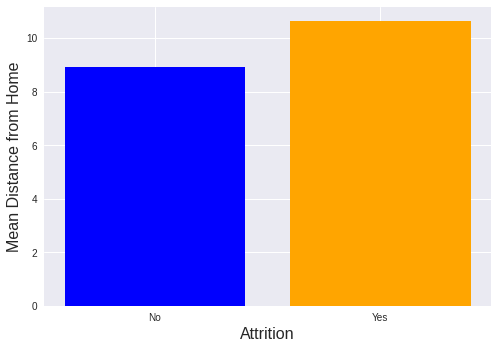

In [631]:
#saving the figure to use for my recommendation
plt.bar(dif_ind, dif_val, color=['blue', 'orange'])
plt.savefig('/content/sample_data/distance.jpg')
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Distance from Home', fontsize=16) #create y-axis labels

dif

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

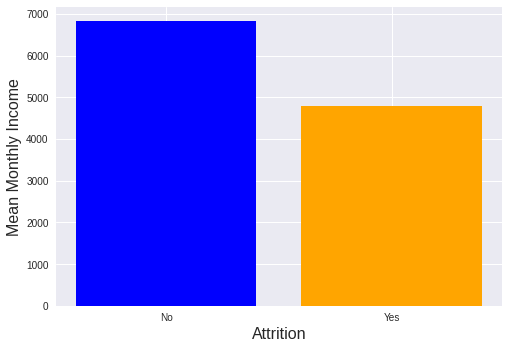

In [632]:
plt.bar(mi_ind, mi_val, color=['blue', 'orange'])
plt.savefig('/content/sample_data/income.jpg')
plt.xlabel('Attrition', fontsize=16) #create x-axis labels
plt.ylabel('Mean Monthly Income', fontsize=16) #create y-axis labels
mi